In [1]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from datetime import date
plt.style.use('seaborn')

In [2]:
dataset = pd.read_csv('globalterrorismdb.csv', encoding = "ISO-8859-1", sep=',', low_memory=False)
df = pd.DataFrame({'year': dataset['iyear'],
                       'month': dataset['imonth'],
                       'day': dataset['iday']})
dataset[['day', 'month', 'year']] = df
dataset = dataset[dataset['year'] >= 2000]

In [3]:
dfPWep = dataset['weapsubtype1_txt'].value_counts();

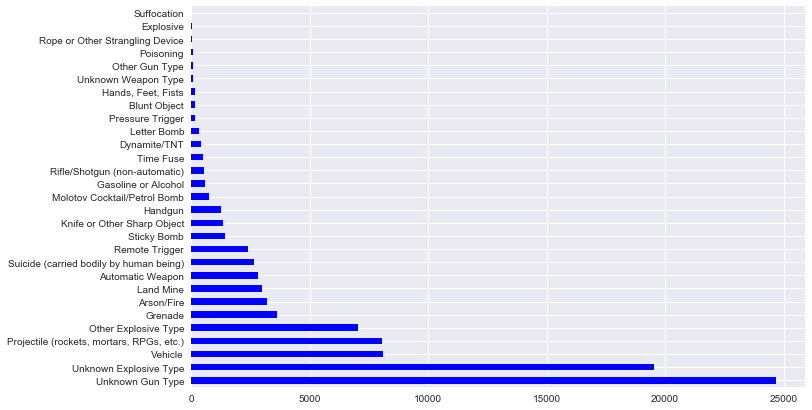

In [4]:
dfPWep.plot(kind='barh',figsize=(11,7), color='blue');

In [5]:
weapons = dataset['weapsubtype1_txt']

In [6]:
weapons = weapons.dropna()

In [7]:
weapons = weapons.drop_duplicates()

In [8]:
weapons

69763                             Unknown Gun Type
69766                       Unknown Explosive Type
69769                                    Time Fuse
69771                         Other Explosive Type
69772                          Gasoline or Alcohol
69777                                   Arson/Fire
69784                               Remote Trigger
69791                 Molotov Cocktail/Petrol Bomb
69792                  Knife or Other Sharp Object
69794                                 Dynamite/TNT
69797                                    Land Mine
69802                                  Letter Bomb
69804                                      Vehicle
69809                                 Blunt Object
69814      Suicide (carried bodily by human being)
69816    Projectile (rockets, mortars, RPGs, etc.)
69821                Rifle/Shotgun (non-automatic)
69825                                      Grenade
69838                             Automatic Weapon
70021                          

In [9]:
dfYeWe = dataset[['iyear','weapsubtype1_txt']]
dfYeWe = pd.DataFrame(dfYeWe)

In [10]:
group01 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Unknown Explosive Type')]
group02 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Unknown Gun Type')]
group03 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Vehicle')]
group04 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Projectile (rockets, mortars, RPGs, etc.)')]
group05 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Other Explosive Type')]
group06 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Handgun')]
group07 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Grenade')]
group08 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Land Mine')]
group09 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Arson/Fire')]
group00 = dfYeWe[(dfYeWe['weapsubtype1_txt'] == 'Suicide (carried bodily by human being)')]
gpk01 = group01.groupby(['iyear']).size()
gpk02 = group02.groupby(['iyear']).size()
gpk03 = group03.groupby(['iyear']).size()
gpk04 = group04.groupby(['iyear']).size()
gpk05 = group05.groupby(['iyear']).size()
gpk06 = group06.groupby(['iyear']).size()
gpk07 = group07.groupby(['iyear']).size()
gpk08 = group08.groupby(['iyear']).size()
gpk09 = group09.groupby(['iyear']).size()
gpk00 = group00.groupby(['iyear']).size()

   

In [11]:
# Creating new series to the new Data Frame 
newDfGr = {
    'Unknown Explosive Type' : gpk01,
    'Unknown Gun Type' : gpk02,
    'Vehicle' : gpk03,
    'Projectile (rockets, mortars, RPGs, etc.)': gpk04,
    'Other Explosive Type': gpk05,
    'Handgun': gpk06,
    'Grenade': gpk07,
    'Land Mine': gpk08,
    'Arson/Fire': gpk09,
    'Suicide (carried bodily by human being)': gpk00
    
}
dfWepYear = pd.DataFrame(newDfGr)

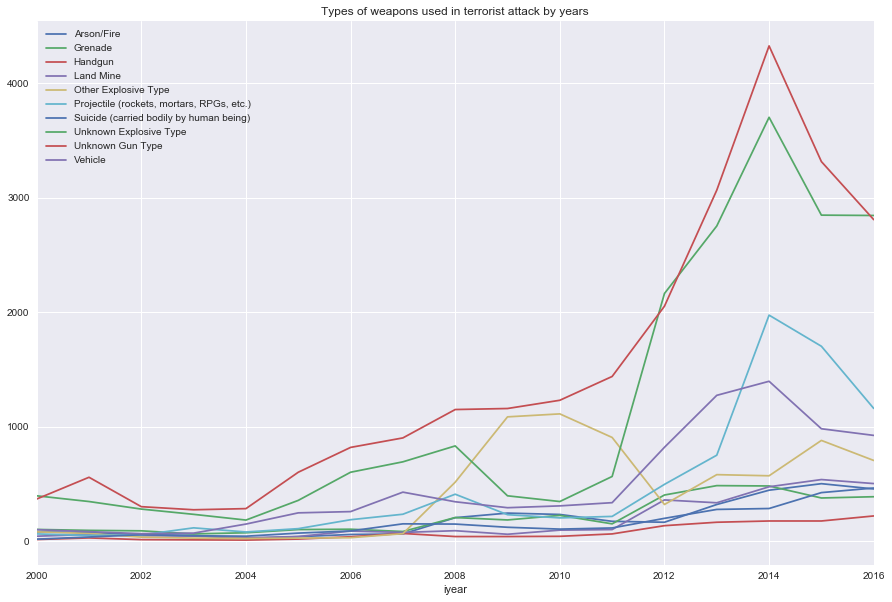

In [12]:
dfWepYear.plot(figsize=(15,10), title="Types of weapons used in terrorist attack by years");

In [14]:
datasetkill = dataset[['year','country_txt', 'nkill', 'nwound']]

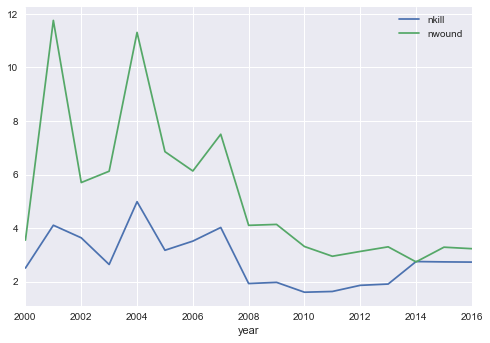

In [17]:
datasetkill.groupby(datasetkill.year).mean().plot();

In [18]:
datasetkillnew = datasetkill.set_index('year')

In [19]:
datasetkillnew = datasetkill[['year', 'nkill']]
datasetwoundnew = datasetkill[['year', 'nwound']]
dtkn = datasetkillnew.groupby('year').size();
dtwm = datasetwoundnew.groupby('year').size();

In [20]:
newDfGrKw = {
    'Killed' : dtkn,
    'Wound' : dtwm
    
}
dfKillWou = pd.DataFrame(newDfGrKw)

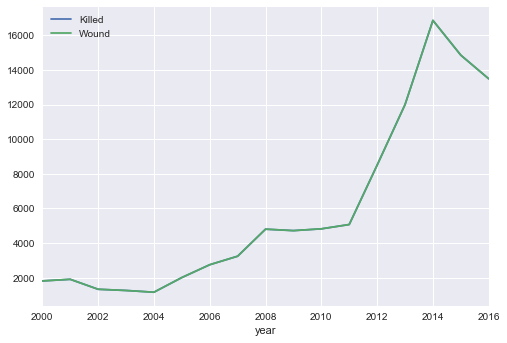

In [21]:
dfKillWou.plot();

In [24]:
dtg = dataset.groupby(['country_txt','year']).size()

In [25]:
dtgroupcountry  = pd.DataFrame(dtg)

In [26]:
dtgroupcountrypivoted = dtgroupcountry.pivot_table(columns='country_txt', index='year')

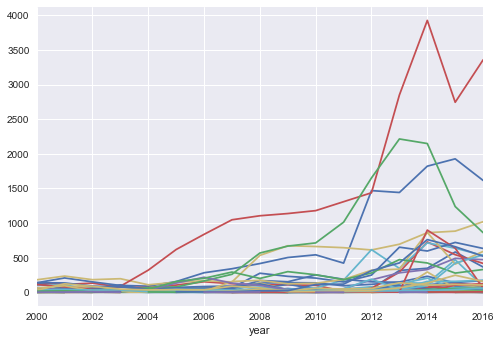

In [27]:
dtgroupcountrypivoted.plot(legend=False);

Days of the month when happens the terrorist attack

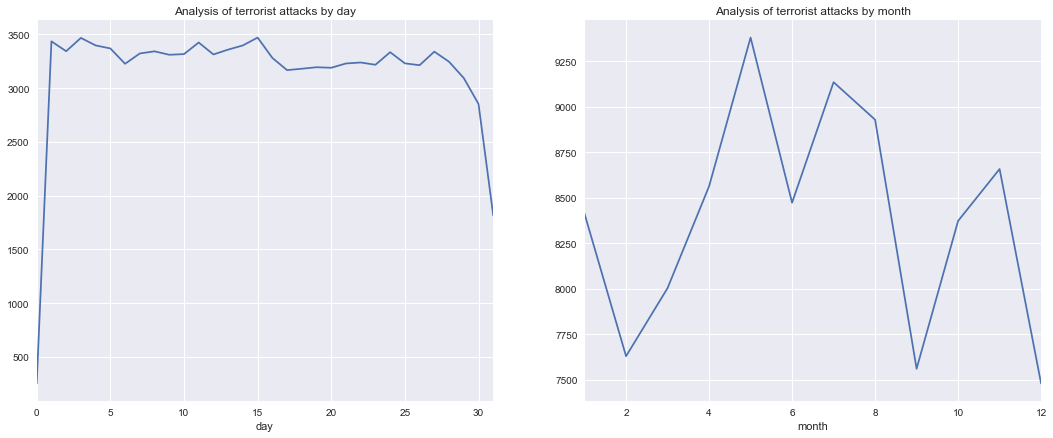

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
dataset.groupby(['day']).size().plot(ax = ax[0], title= 'Analysis of terrorist attacks by day');
dataset.groupby(['month']).size().plot(ax = ax[1], title = 'Analysis of terrorist attacks by month');

In [69]:
dtGrouAtt = dataset.groupby(['year', 'attacktype1_txt']).size()

In [70]:
dtGrouAtt

year  attacktype1_txt                    
2000  Armed Assault                           492
      Assassination                           103
      Bombing/Explosion                       904
      Facility/Infrastructure Attack          111
      Hijacking                                 7
      Hostage Taking (Barricade Incident)       2
      Hostage Taking (Kidnapping)             125
      Unarmed Assault                          26
      Unknown                                  43
2001  Armed Assault                           582
      Assassination                           127
      Bombing/Explosion                       801
      Facility/Infrastructure Attack          148
      Hijacking                                14
      Hostage Taking (Barricade Incident)       4
      Hostage Taking (Kidnapping)             145
      Unarmed Assault                          41
      Unknown                                  45
2002  Armed Assault                           366
      As

In [74]:
dtGrouAtt = pd.DataFrame(dtGrouAtt, index=None)

In [76]:
dtGrouAtt.set_index('year')

KeyError: 'year'

In [77]:
dtGrouAtt = dtGrouAtt.pivot_table(columns='attacktype1_txt', index='year')

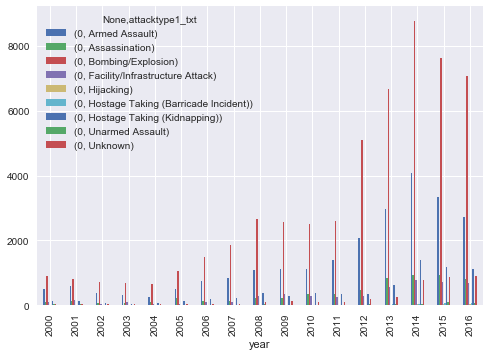

In [81]:
dtGrouAtt.plot(kind='bar');

In [79]:
dtGrouAtt

0                                  \
attacktype1_txt Armed Assault Assassination Bombing/Explosion   
year                                                            
2000                    492.0         103.0             904.0   
2001                    582.0         127.0             801.0   
2002                    366.0          73.0             721.0   
2003                    310.0          86.0             680.0   
2004                    258.0         104.0             656.0   
2005                    510.0         225.0            1063.0   
2006                    737.0         140.0            1500.0   
2007                    849.0         140.0            1864.0   
2008                   1092.0         219.0            2660.0   
2009                   1116.0         227.0            2566.0   
2010                   1111.0         360.0            2509.0   
2011                   1393.0         342.0            2589.0   
2012                   2078.0         458.0            5079.0   
2013                   2958.0         846.0            6672.0   
2014                   4066.0         919.0            8775.0   
2015                   3339.0         924.0            7608.0   
2016                   2713.0         815.0            7075.0   

                                                          \
attacktype1_txt Facility/Infrastructure Attack Hijacking   
year                                                       
2000                                     111.0       7.0   
2001                                     148.0      14.0   
2002                                      49.0       6.0   
2003                                      88.0       3.0   
2004                                      33.0       1.0   
2005                                      45.0       2.0   
2006                                     107.0       3.0   
2007                                     116.0       7.0   
2008                                     285.0      15.0   
2009                                     348.0      23.0   
2010                                     293.0      13.0   
2011                                     242.0       9.0   
2012                                     301.0       5.0   
2013                                     556.0      17.0   
2014                                     782.0      48.0   
2015                                     703.0      37.0   
2016                                     688.0      43.0   

                                                     \
attacktype1_txt Hostage Taking (Barricade Incident)   
year                                                  
2000                                            2.0   
2001                                            4.0   
2002                                            4.0   
2003                                            2.0   
2004                                            3.0   
2005                                            NaN   
2006                                            7.0   
2007                                            6.0   
2008                                            2.0   
2009                                            4.0   
2010                                            8.0   
2011                                            2.0   
2012                                           18.0   
2013                                           26.0   
2014                                           46.0   
2015                                           80.0   
2016                                           60.0   

                                                                     
attacktype1_txt Hostage Taking (Kidnapping) Unarmed Assault Unknown  
year                                                                 
2000                                  125.0            26.0    43.0  
2001                                  145.0            41.0    45.0  
2002                                   78.0            10.0    25.0  
2003 